In [55]:
import keras_cv
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [32]:
ds = tfds.load('mnist', split='train', shuffle_files=True).shuffle(1024)

Dataset oxford_flowers102 downloaded and prepared to /home/ayushthakur/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


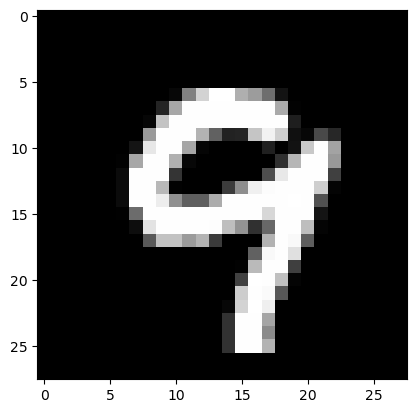

In [36]:
image_sample = np.reshape(next(iter(ds))["image"].numpy(), (28,28,1))
plt.imshow(image_sample, cmap="gray")

In [42]:
rand_augment = keras_cv.layers.RandAugment(
    value_range=(0, 255),
    augmentations_per_image=3,
    magnitude=0.6,
    magnitude_stddev=0.2,
    rate=0.5,
)

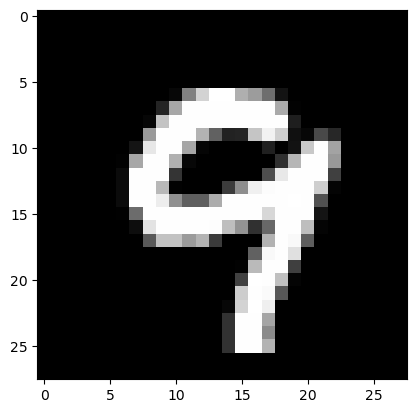

In [51]:
rand_aug_img = rand_augment(image_sample)
plt.imshow(rand_aug_img, cmap="gray")

In [54]:
layers = keras_cv.layers.RandAugment.get_standard_policy(
    value_range=(0, 255), magnitude=0.75, magnitude_stddev=0.3
)
layers

In [59]:
channel_shuffle = keras_cv.layers.ChannelShuffle(groups=1)

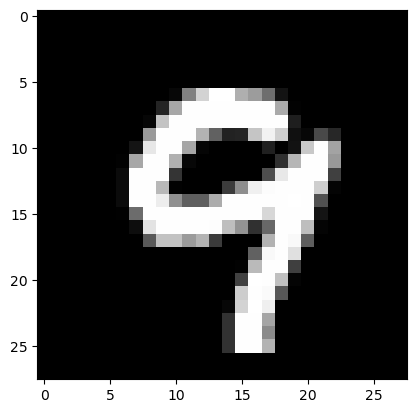

In [60]:
rand_aug_img = channel_shuffle(image_sample)
plt.imshow(rand_aug_img, cmap="gray")

In [61]:
random_saturate = keras_cv.layers.RandomSaturation(factor=1.0)

In [62]:
rand_aug_img = random_saturate(image_sample)
plt.imshow(rand_aug_img, cmap="gray")

InvalidArgumentError: Exception encountered when calling layer "random_saturation" (type RandomSaturation).

input must have 3 channels but instead has 1 channels. [Op:AdjustSaturation]

Call arguments received by layer "random_saturation" (type RandomSaturation):
  • inputs=tf.Tensor(shape=(28, 28, 1), dtype=uint8)
  • training=True